In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from astropy.timeseries import LombScargle

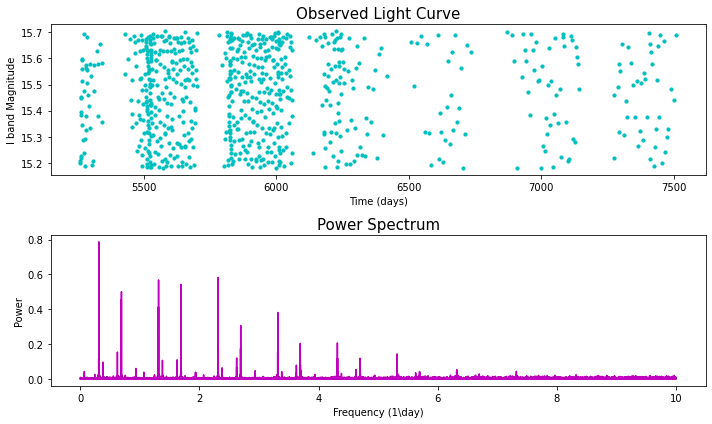

In [2]:
time, I_mag, e_I_mag = np.genfromtxt("OGLE-LMC-CEP-0100.dat", unpack=True)
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.scatter(time, I_mag, c='c', s=10)
plt.xlabel("Time (days)")
plt.ylabel("I band Magnitude")
plt.title("Observed Light Curve",size=15)

frequency, power = LombScargle(time, I_mag, e_I_mag).autopower(minimum_frequency=0.001, maximum_frequency=10)
plt.subplot(2,1,2)
plt.plot(frequency, power,c='m',)
plt.xlabel('Frequency (1\day)')
plt.ylabel('Power')
plt.title("Power Spectrum", size=15)
plt.tight_layout()
plt.show()

In [3]:
period = 1/frequency[np.argmax(power)]
print(period)

3.2091435426590516


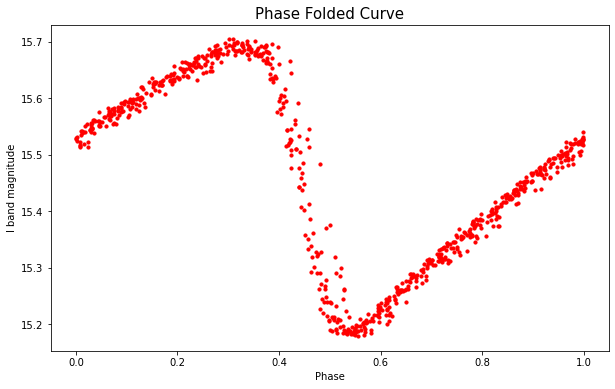

In [4]:
phase = np.remainder(time,period)/period
plt.figure(figsize=(10,6))
plt.scatter(phase,I_mag,c='r',s=10)
plt.xlabel("Phase")
plt.ylabel("I band magnitude")
plt.title("Phase Folded Curve",size=15)
plt.show()